In [3]:
model_save_path = "saved_model_cnn1"
cols = ["KOSPI", "KOSPI_START", "KOSPI_HIGH", "KOSPI_LOW", "KOSPI_TRADE_VOL", "KOSPI_TRADE_VAL", "KOSPI_HIGH_LOW_GAP", "NASDAQ", "DOW", "CR", "GOLD"]
# cols = ["KOSPI", "KOSPI_START", "KOSPI_HIGH", "KOSPI_LOW"]
len_x_ARMA = 200
len_y_nextday = 1
scale_method = "minmax"

In [5]:
from kospi_predict import Crawler

crawler = Crawler(crawl_page_max=30, perPage=100)
# crawler.crawlData(cols, save=True)
crawler.loadFromSavedFile(cols)
df_crawled = crawler.removeNan()
# df_crawled = df_crawled.loc[:2000]
df_crawled


KOSPI : 데이터 수집중...
KOSPI_START : 데이터 수집중...
KOSPI_HIGH : 데이터 수집중...
KOSPI_LOW : 데이터 수집중...
KOSPI_TRADE_VOL : 데이터 수집중...
KOSPI_TRADE_VAL : 데이터 수집중...
KOSPI_HIGH_LOW_GAP : 데이터 수집중...
NASDAQ : 30번째 페이지 데이터 수집중...
DOW : 30번째 페이지 데이터 수집중...
CR : 30번째 페이지 데이터 수집중...


,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,KOSPI_TRADE_VOL,KOSPI_TRADE_VAL,KOSPI_HIGH_LOW_GAP,NASDAQ,DOW,CR,GOLD
0,2023-04-28,2501.53,2511.79,2517.13,2489.58,7.775351e+08,1.402483e+13,-27.55,12142.238,33826.16,1341.0,1983.29
1,2023-04-27,2495.81,2484.31,2499.01,2465.83,7.334999e+08,1.114211e+13,-33.18,11854.351,33301.87,1341.0,1998.14
2,2023-04-26,2484.83,2489.49,2498.56,2481.38,1.089216e+09,1.239751e+13,-17.18,11799.157,33530.83,1338.5,1997.63
3,2023-04-25,2489.02,2531.35,2531.35,2472.33,8.864218e+08,1.368115e+13,-59.02,12037.204,33875.40,1341.0,1989.68
4,2023-04-24,2523.50,2538.36,2541.89,2518.73,9.271913e+08,1.158947e+13,-23.16,12072.456,33808.96,1334.5,1986.55
...,...,...,...,...,...,...,...,...,...,...,...,...
2934,2011-06-07,2099.71,2093.45,2106.85,2091.26,2.466206e+08,6.213589e+12,-15.59,2702.560,12089.96,1079.5,1547.90
2935,2011-06-03,2113.47,2123.47,2131.93,2108.75,2.641076e+08,6.858157e+12,-23.18,2773.310,12248.55,1079.0,1533.85
2936,2011-06-02,2114.20,2098.37,2126.80,2093.97,2.487789e+08,7.307482e+12,-32.83,2769.190,12290.14,1079.0,1542.68
2937,2011-06-01,2141.34,2142.67,2152.95,2132.85,2.947077e+08,8.124100e+12,-20.10,2835.300,12569.79,1075.0,1532.18


In [6]:
from kospi_predict import DataPreprocessor
from sklearn.preprocessing import MinMaxScaler as MinMaxScaler

dpp = DataPreprocessor(df_crawled, cols, scale_method, model_save_path)
dpp.sortByDate()
# dpp.makeDiffByRange(1, len_x_ARMA)
# dpp.makeDiffRatio()
# dpp.makeAR(0, len_x_ARMA)
# dpp.makeMA(2, len_x_ARMA)
dpp.makeTargetYs(len_y_nextday)
dpp.cutoffData(len_x_ARMA, len_y_nextday)

In [7]:
# df = dpp.df[500:1500]
# df.reset_index(drop=True, inplace=True)
dpp.df

,date,KOSPI,KOSPI_START,KOSPI_HIGH,KOSPI_LOW,KOSPI_TRADE_VOL,KOSPI_TRADE_VAL,KOSPI_HIGH_LOW_GAP,NASDAQ,DOW,CR,GOLD,Y_KOSPI_nextday_1
0,2012-03-20,2042.15,2046.38,2055.34,2035.26,5.403368e+08,5.404193e+12,-20.08,3078.320,13239.13,1127.5,1648.50,2027.23
1,2012-03-21,2027.23,2031.58,2039.80,2022.97,5.170666e+08,5.174204e+12,-16.83,3074.150,13170.19,1127.0,1658.20,2026.12
2,2012-03-22,2026.12,2026.75,2031.42,2017.93,5.417263e+08,5.301426e+12,-13.49,3075.320,13124.62,1132.0,1641.05,2026.83
3,2012-03-23,2026.83,2015.07,2029.77,2013.72,5.067696e+08,4.829003e+12,-16.05,3063.320,13046.14,1133.5,1651.15,2019.19
4,2012-03-26,2019.19,2035.17,2041.05,2012.86,4.369753e+08,4.591120e+12,-28.19,3067.920,13080.73,1142.5,1657.68,2039.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2023-04-21,2544.40,2556.70,2559.44,2532.32,9.703980e+08,1.261467e+13,-27.12,12059.558,33786.62,1332.0,1988.30,2523.50
2733,2023-04-24,2523.50,2538.36,2541.89,2518.73,9.271913e+08,1.158947e+13,-23.16,12072.456,33808.96,1334.5,1986.55,2489.02
2734,2023-04-25,2489.02,2531.35,2531.35,2472.33,8.864218e+08,1.368115e+13,-59.02,12037.204,33875.40,1341.0,1989.68,2484.83
2735,2023-04-26,2484.83,2489.49,2498.56,2481.38,1.089216e+09,1.239751e+13,-17.18,11799.157,33530.83,1338.5,1997.63,2495.81


In [20]:
import cv2
import numpy as np
import pandas as pd

def rescalingByMinMax(arr):
    for col_idx in range(arr.shape[1]):
        this_arr = arr[:, col_idx]
        max_val = max(this_arr)
        min_val = min(this_arr)
        for row_idx, val in enumerate(this_arr):
            new_val = (val - min_val) / (max_val - min_val)
            arr[row_idx, col_idx] = new_val
    return arr

def makeImage3D(df, row_cnt = 8):
    img_list = []
    label_list = []
    date_list = []
    y_list = []
    for idx in range(len(df)):
        if idx > 200:
            this_mat = np.empty(shape=(row_cnt, len(cols), 3))
            for i in range(1, 4):
                this_ch = rescalingByMinMax(np.array(df.iloc[idx-(row_cnt*i):idx-(row_cnt*(i-1)), 1:len(cols)+1], dtype=np.float32))
                this_mat[:, :, i-1] = this_ch
            this_mat = cv2.resize(this_mat, (32, 32))
            img_list.append(this_mat)

            #라벨 체크
            this_label = np.nan
            if idx+1 < len(df): #0 1 2 ... 29 / 30
                this_label = 0
                if df.iloc[idx+1, 1] > df.iloc[idx, 1]: #item[0]+1 : 다음날
                    this_label = 1
            label_list.append(this_label)

            #라벨값과 함께 이미지로 저장
            cv2.imwrite("../data_cnn/{}_{}.png".format(str(this_label), df.iloc[idx, 0]), this_mat * 255)

            #날짜 리스트 입력
            date_list.append(df.iloc[idx, 0])

            #y_list 입력
            y_list.append(df.iloc[idx, -1])

    img_list = np.array(img_list[:-1])
    label_list = np.array(label_list[:-1], dtype=np.uint8)
    date_list = np.array(date_list[:-1])
    y_list = np.array(y_list[:-1])
    df_result = pd.DataFrame({"date" : date_list, "label" : label_list})

    return img_list, label_list, date_list, y_list, df_result

img_list, label_list, date_list, y_list, df_ref = makeImage3D(dpp.df, row_cnt=len(cols))
img_list.shape, label_list.shape, date_list.shape, y_list.shape

((2535, 32, 32, 3), (2535,), (2535,), (2535,))

In [21]:
df_ref

,date,label
0,2013-01-10,0
1,2013-01-11,1
2,2013-01-14,0
3,2013-01-15,0
4,2013-01-16,0
...,...,...
2530,2023-04-20,0
2531,2023-04-21,0
2532,2023-04-24,0
2533,2023-04-25,0


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list[:-1], label_list[:-1], test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2027, 32, 32, 3), (507, 32, 32, 3), (2027,), (507,))

In [26]:
import tensorflow as tf

model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(32, 32, 3), pooling="max")

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

epochs=200
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  batch_size = 128,
  validation_split = 0.2,
  verbose = 1
)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

<Axes: >

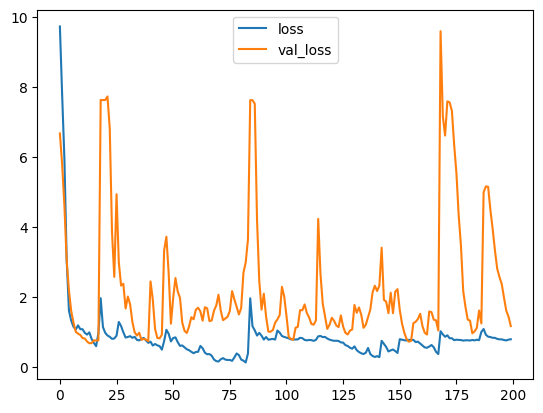

In [28]:
df_history = pd.DataFrame(history.history)
df_history[["loss", "val_loss"]].plot()

<Axes: >

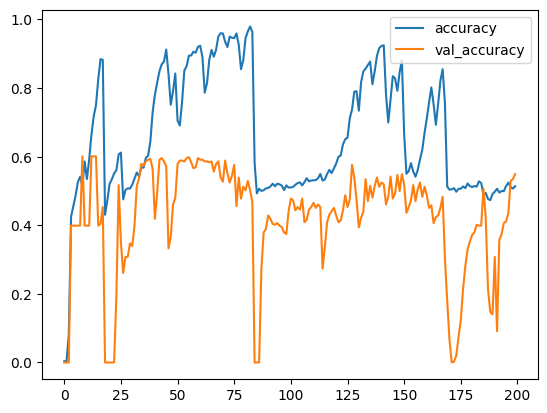

In [29]:
df_history[["accuracy", "val_accuracy"]].plot()

In [ ]:
preds = model.predict(x_test)
test_results = []
for idx, pred in enumerate(preds):
    this_label = y_test[idx]
    this_predict = np.argmax(pred)
    acc = 0
    if this_label == this_predict:
        acc = 1
    test_results.append({"label" : this_label, "predict" : this_predict, "acc" : acc})

test_results = pd.DataFrame(test_results)
test_results

In [ ]:
acc_ratio = test_results["acc"].sum() / len(test_results)
print("테스트 정확도 : {}/{} ({:.2f})".format(test_results["acc"].sum(), len(test_results), acc_ratio))

최근 날짜로 테스트

In [ ]:
crawler_pred = Crawler(crawl_page_max=1, perPage=100) #이전 추세도 볼겸 넉넉히 수집
crawler_pred.crawlData(cols)
df_crawled_pred = crawler_pred.removeNan()
df_crawled_pred

In [ ]:
#아래는 예측을 위한 전처리
dpp_pred = DataPreprocessor(df_crawled_pred.loc[:100], cols, scale_method, model_save_path)
dpp_pred.sortByDate()
dpp_pred.makeDiffRatio()
dpp_pred.scalingForPredict()
dpp_pred.makeAR(0, len_x_ARMA)
dpp_pred.makeMA(2, len_x_ARMA)
dpp_pred.cutoffData(len_x_ARMA, 0)

In [ ]:
dpp_pred.df

In [ ]:
img_pred_list, label_pred_list, date_list, _ = makeImage2D(dpp_pred.df, cut_latest_data=False)
len(img_pred_list), len(label_pred_list), len(date_list)

In [ ]:
label_pred_list

In [ ]:
before_day = 1
img_pred = np.array([img_pred_list[-before_day]])
pred = model.predict(img_pred)
test_results = []
predict = np.argmax(pred)
print("{} predict : {}, real : {}".format(date_list[-before_day], predict, label_pred_list[-before_day]))

# CNN + 예측

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img_list, y_list, test_size=0.2, shuffle=False, random_state=8699)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(24, 20, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(20, activation="relu")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

model.summary()
epochs=5000
history = model.fit(
  x_train,
  y_train,
  epochs=epochs,
  validation_split = 0.1,
  verbose = 1
)